In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave10"] > 0].dropna()

# Drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (drop outcome and treat1 for baseline)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# Split 70/30 train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Find optimal cost complexity pruning parameter
tree_full = DecisionTreeRegressor(random_state=42)
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 2: Train trees for each alpha and use CV to select best
trees = []
mse_list = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    trees.append(tree)
    mse_list.append(mse)

# Find alpha with lowest test MSE
best_idx = np.argmin(mse_list)
best_alpha = ccp_alphas[best_idx]
best_tree = trees[best_idx]
print(f"Optimal ccp_alpha: {best_alpha:.5f}")
print(f"Test MSE of pruned tree: {mse_list[best_idx]:.2f}")

# Plot MSE vs alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, mse_list, marker="o")
plt.xlabel("ccp_alpha")
plt.ylabel("Test MSE")
plt.title("Pruned Tree: Test MSE vs CCP Alpha")
plt.show()

# Plot the pruned regression tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Optimized Regression Tree for cons_tot_wave10")
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_61476\2523040896.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


C:\Users\Zach\AppData\Local\Temp\ipykernel_24040\544701644.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


Test MSE: 1307331.59
Test RMSE: 1143.39
Test MAE: 811.02


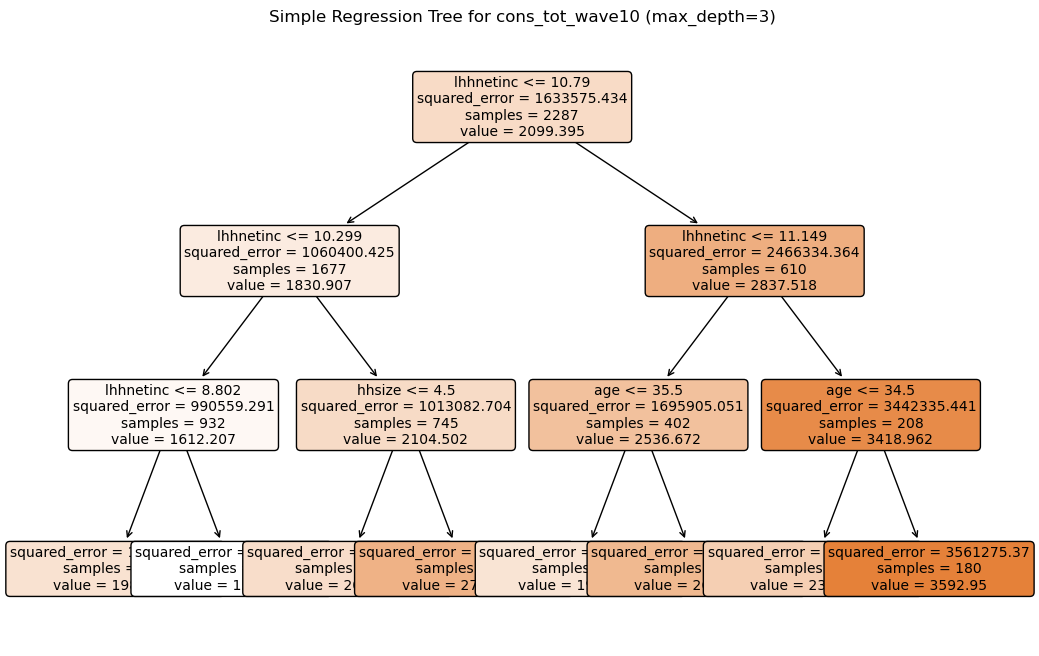

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave10"] > 0].dropna()

# Drop treat5 if present
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (drop outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train a simple, shallow regression tree ---
simple_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train)

# --- Predictions and evaluation ---
y_pred = simple_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# --- Plot the tree ---
plt.figure(figsize=(12, 8))
plot_tree(
    simple_tree,
    feature_names=list(X.columns),  # convert Index to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simple Regression Tree for cons_tot_wave10 (max_depth=3)")
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_24040\1708829218.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


Test MSE: 1288876.71
Test RMSE: 1135.29
Test MAE: 795.31


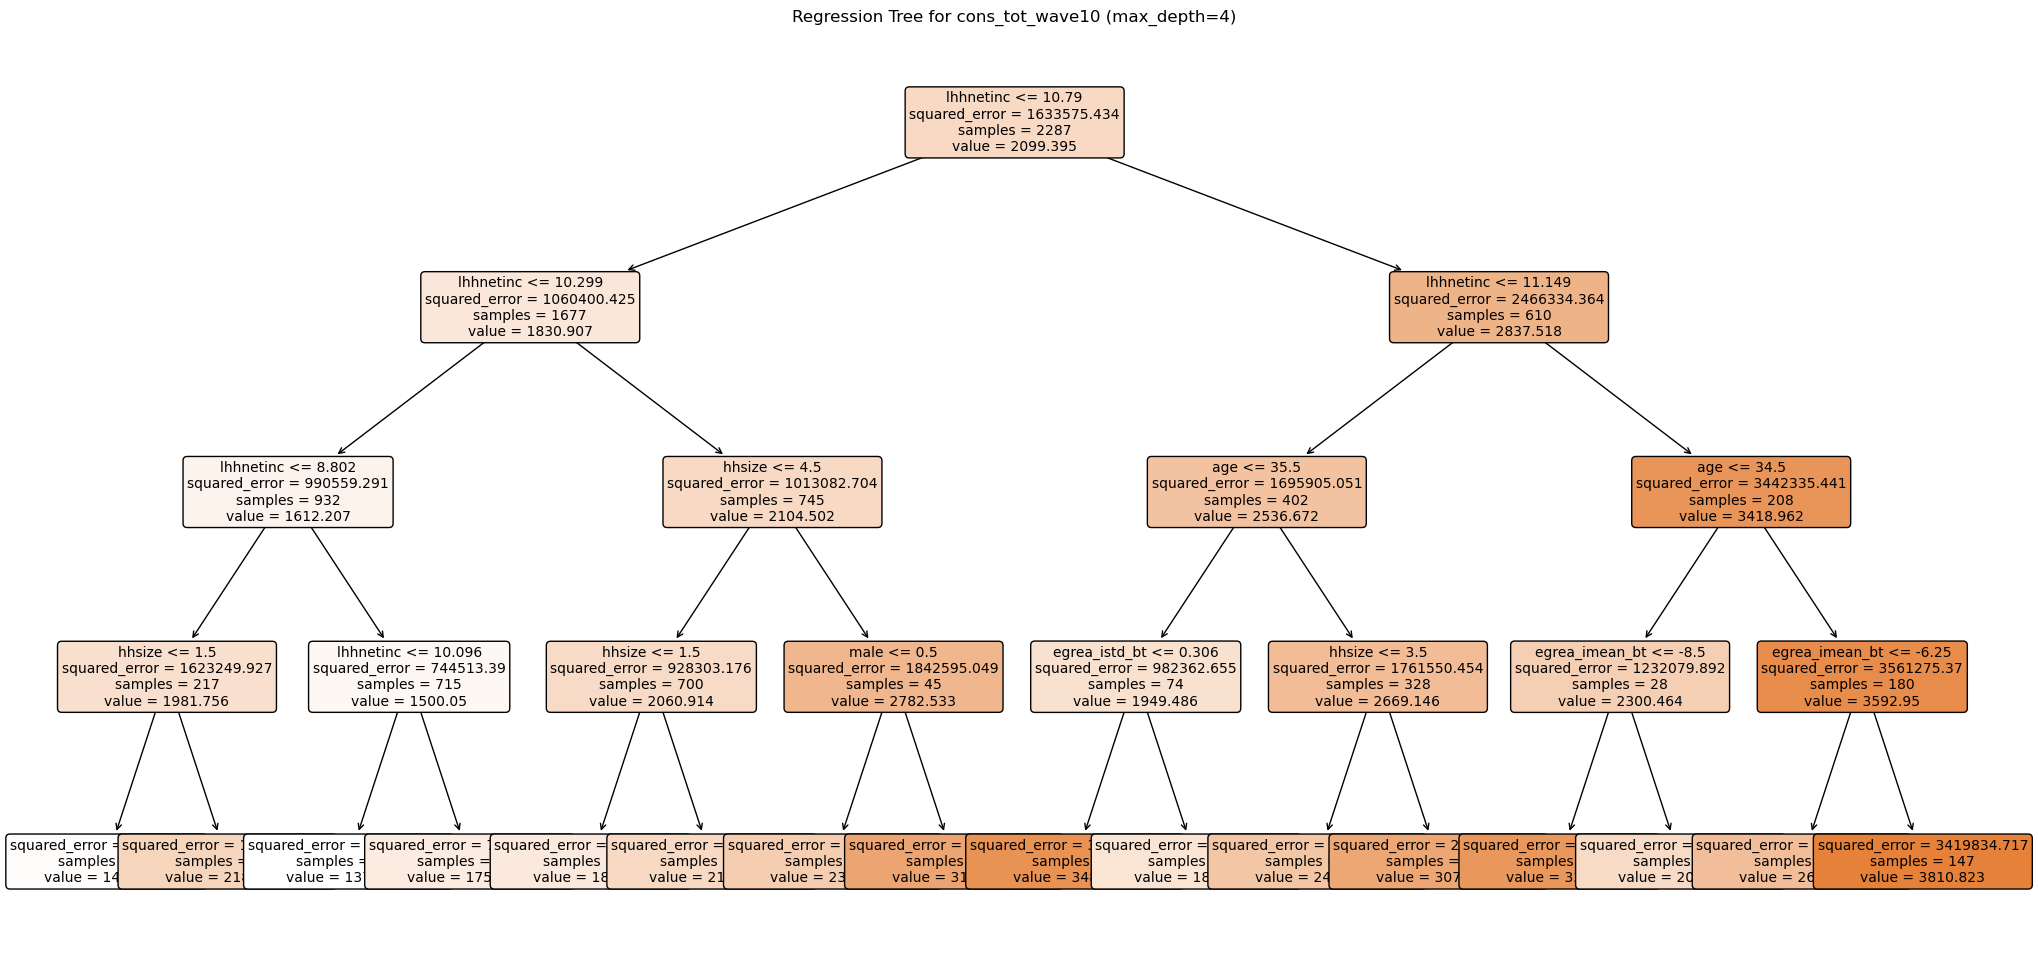

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave10"] > 0].dropna()

# Drop treat5 if present
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (drop outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train regression tree with max depth 4 ---
tree_max4 = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_max4.fit(X_train, y_train)

# --- Predictions and evaluation ---
y_pred = tree_max4.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# --- Plot the tree ---
plt.figure(figsize=(25, 12))  # wide & tall for readability
plot_tree(
    tree_max4,
    feature_names=list(X.columns),  # convert Index to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Regression Tree for cons_tot_wave10 (max_depth=4)")
plt.savefig("regression_tree_max4.png", dpi=300, bbox_inches='tight')  # save as high-res PNG
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_75020\2496987428.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


Test MSE: 19.87
Test RMSE: 4.46
Test MAE: 0.56


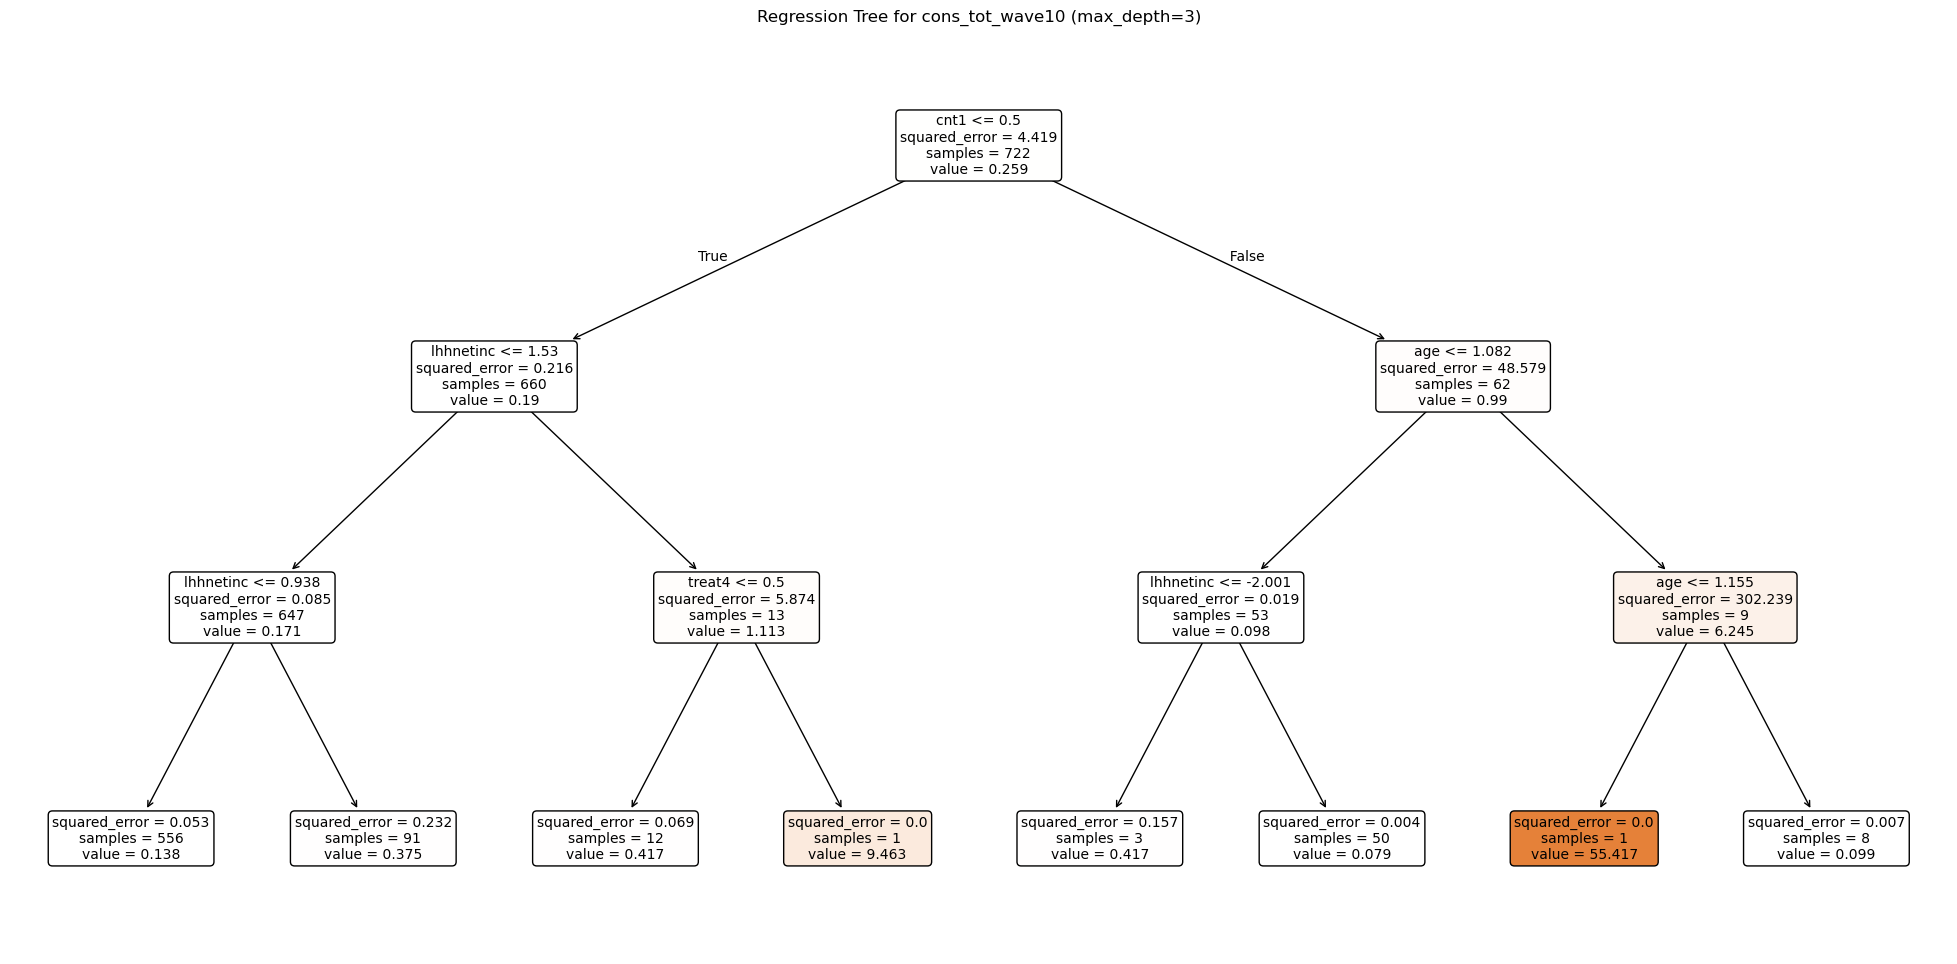

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset_standardized3.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave10"] > 0].dropna()

# Drop treat5 if present
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (drop outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train regression tree with max depth 4 ---
tree_max4 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_max4.fit(X_train, y_train)

# --- Predictions and evaluation ---
y_pred = tree_max4.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# --- Plot the tree ---
plt.figure(figsize=(25, 12))  # wide & tall for readability
plot_tree(
    tree_max4,
    feature_names=list(X.columns),  # convert Index to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Regression Tree for cons_tot_wave10 (max_depth=3)")
plt.savefig("regression_tree_max4.png", dpi=300, bbox_inches='tight')  # save as high-res PNG
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_24040\4107918997.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


           Feature  Importance
5        lhhnetinc    0.305116
16             age    0.150652
3   egrea_imean_bt    0.148360
4    egrea_istd_bt    0.112547
12          hhsize    0.072198
1           treat3    0.022961
7             cnt2    0.021497
9             cnt4    0.020521
13            male    0.020356
0           treat2    0.017115
2           treat4    0.016262
10            cnt5    0.015274
15           dedu3    0.014774
14           dedu2    0.014206
17    liquid_wave9    0.013849
8             cnt3    0.012840
6             cnt1    0.010796
11            cnt6    0.010676


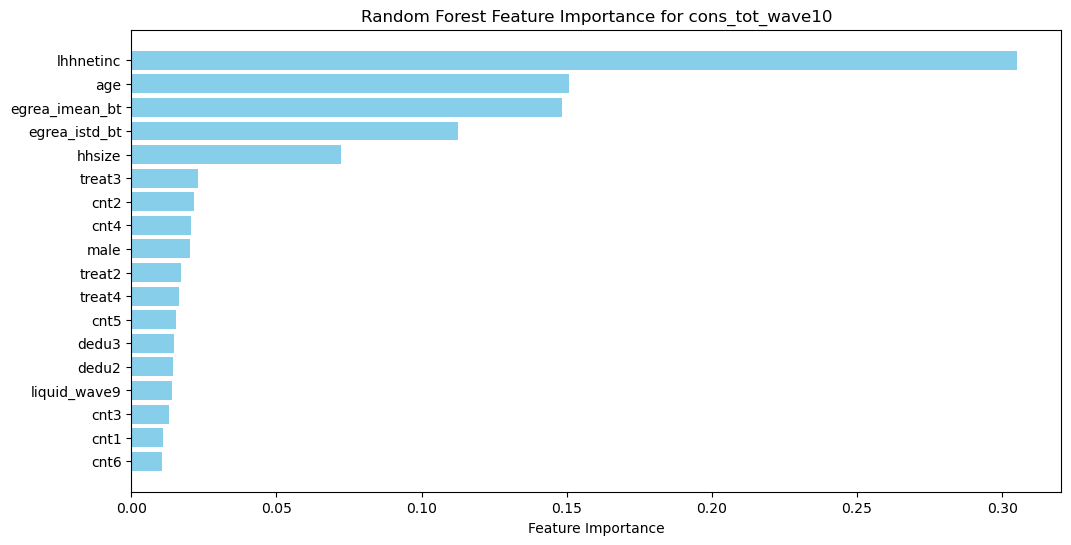

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave10"] > 0].dropna()

# Drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (exclude outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# --- Feature importances ---
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# --- Plot feature importance ---
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # largest importance on top
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for cons_tot_wave10')
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_24040\3211241689.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


           Feature  Importance
5        lhhnetinc    0.319957
16             age    0.149679
3   egrea_imean_bt    0.142933
4    egrea_istd_bt    0.105086
12          hhsize    0.074645
7             cnt2    0.021224
1           treat3    0.021178
0           treat2    0.020585
9             cnt4    0.019867
13            male    0.018894
17    liquid_wave9    0.016427
2           treat4    0.014845
10            cnt5    0.014050
15           dedu3    0.013511
8             cnt3    0.012611
14           dedu2    0.012504
6             cnt1    0.011680
11            cnt6    0.010325


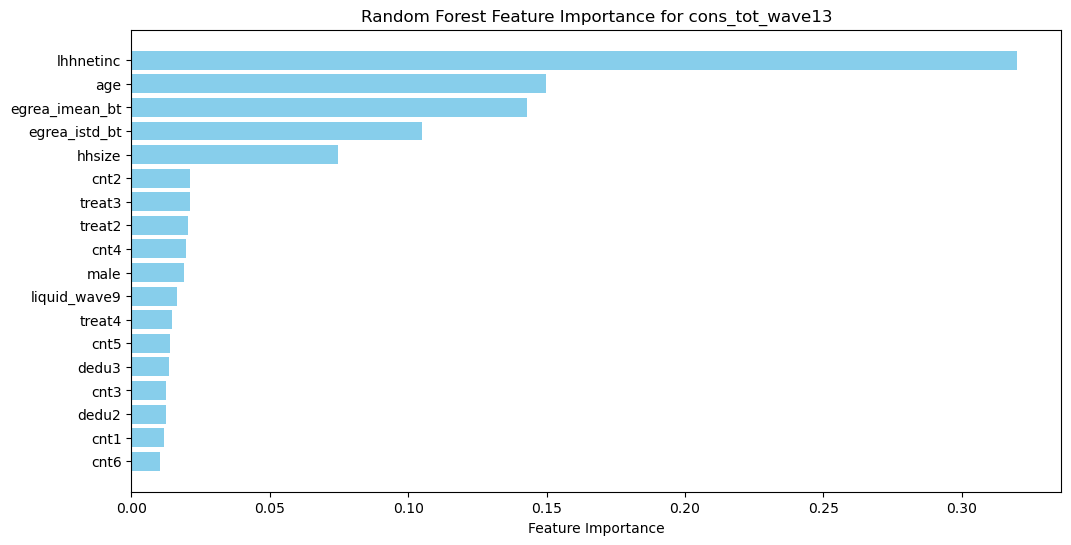

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave13"] > 0].dropna()

# Drop treat5
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave10"] <= 10000]

# Define predictors (exclude outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave10"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# --- Feature importances ---
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# --- Plot feature importance ---
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # largest importance on top
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for cons_tot_wave13')
plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_24040\3680905411.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


Test MSE: 1462813.36
Test RMSE: 1209.47
Test MAE: 853.10


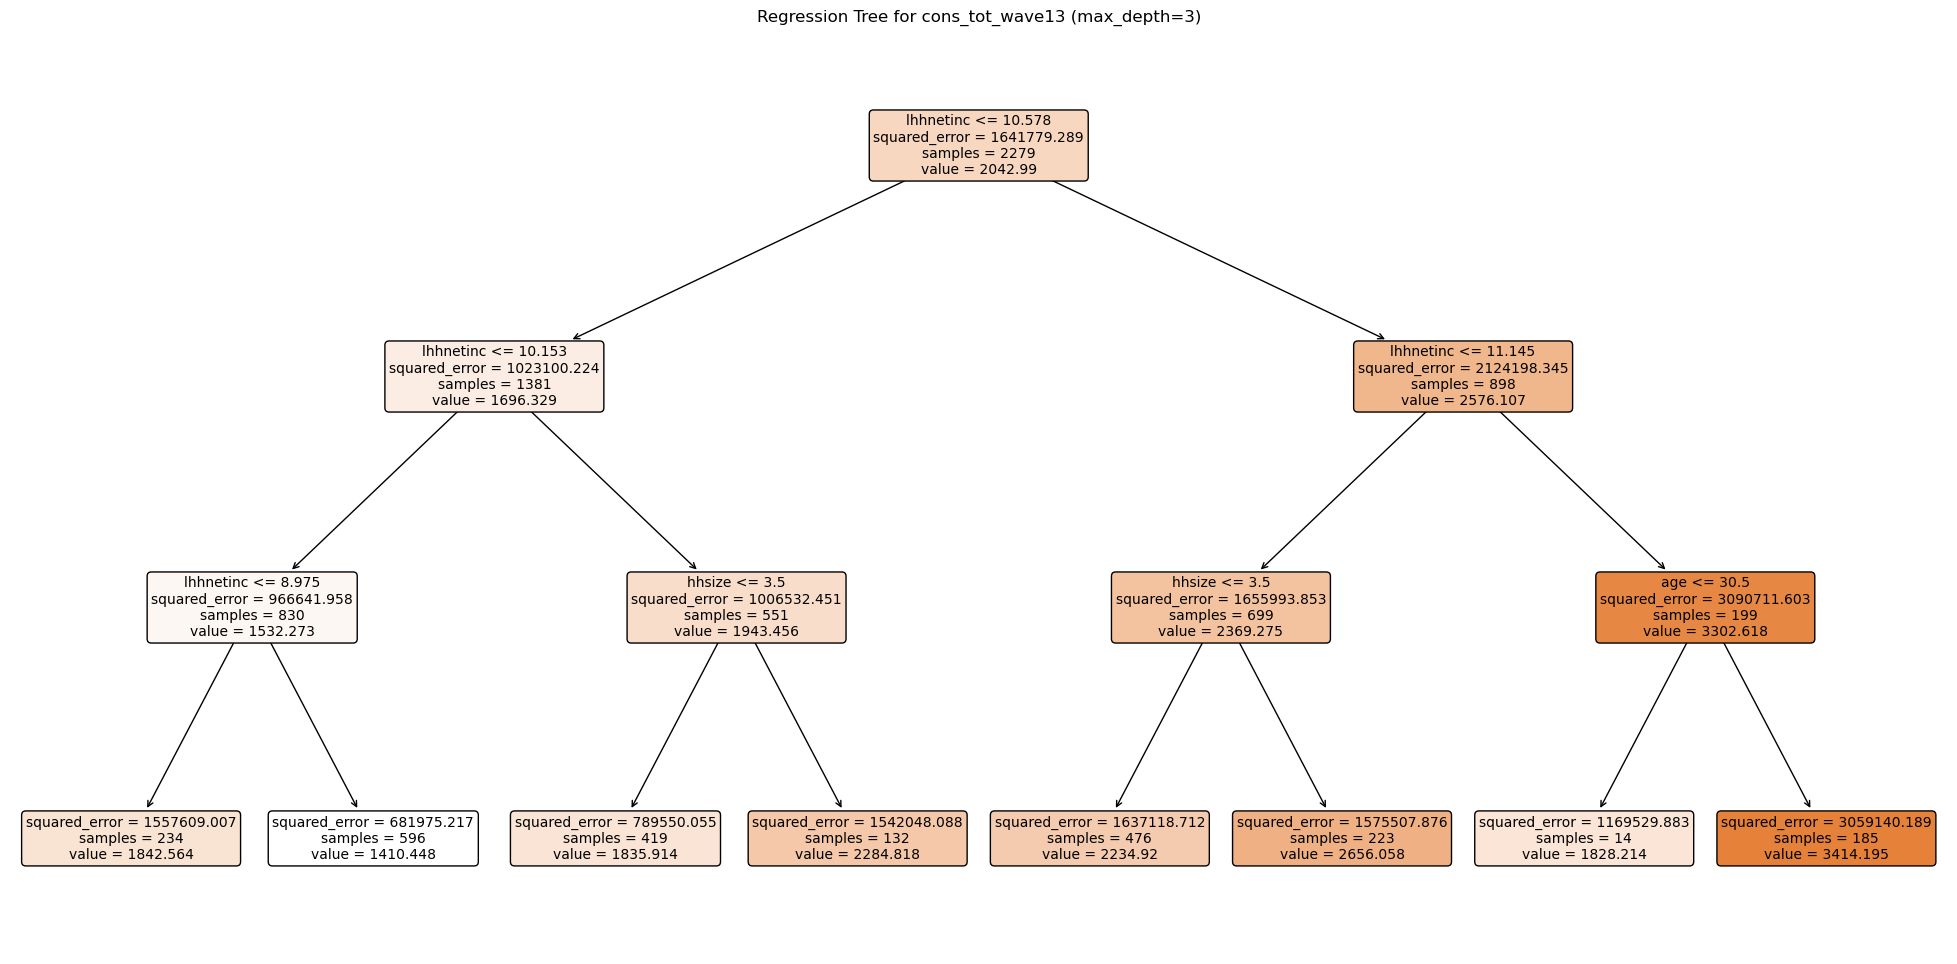

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("CesDataClean3_subset.csv")

# Convert booleans to 0/1
df = df.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Force numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Keep only positive consumption rows
df = df[df["cons_tot_wave13"] > 0].dropna()

# Drop treat5 if present
if "treat5" in df.columns:
    df = df.drop(columns=["treat5"])

# Filter out extreme values (>10,000)
df_filtered = df[df["cons_tot_wave13"] <= 10000]

# Define predictors (drop outcome, treat1, and cons_tot_wave13)
predictors = [col for col in df_filtered.columns if col not in ["cons_tot_wave10", "treat1", "cons_tot_wave13"]]
X = df_filtered[predictors].astype(float)
y = df_filtered["cons_tot_wave13"].astype(float)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train regression tree with max depth 4 ---
tree_max4 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_max4.fit(X_train, y_train)

# --- Predictions and evaluation ---
y_pred = tree_max4.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# --- Plot the tree ---
plt.figure(figsize=(25, 12))  # wide & tall for readability
plot_tree(
    tree_max4,
    feature_names=list(X.columns),  # convert Index to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Regression Tree for cons_tot_wave13 (max_depth=3)")
plt.savefig("regression_tree_max4.png", dpi=300, bbox_inches='tight')  # save as high-res PNG
plt.show()
